## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [29]:
# For SATORI based interactions
#df = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
df = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [30]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [31]:
df.shape

(1813, 12)

In [32]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
5,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,260.0,356.0,373.0,670.0,0.000007,0.000090
34,filter0<-->filter72,71,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.020346,49.0,152.0,561.0,781.0,0.010985,0.036801
38,filter0<-->filter80,79,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.At4g38000_col_a_m1,0.005174,141.0,16.0,562.0,917.0,0.000084,0.000688
40,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.013146,67.0,33.0,689.0,1029.0,0.000934,0.004880
47,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021108,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,273.0,490.0,625.0,1022.0,0.008024,0.028323


### Annotate the interacting motifs

In [33]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[1].strip('.tnt'))
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[1].strip('.tnt'))

In [34]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
5,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,260.0,356.0,373.0,670.0,0.000007,0.000090,TCP1,AT2G40260
34,filter0<-->filter72,71,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.020346,49.0,152.0,561.0,781.0,0.010985,0.036801,TCP1,AT1G69570
38,filter0<-->filter80,79,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.At4g38000_col_a_m1,0.005174,141.0,16.0,562.0,917.0,0.000084,0.000688,TCP1,At4g38000
40,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.013146,67.0,33.0,689.0,1029.0,0.000934,0.004880,TCP1,AT2G40260
47,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021108,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,273.0,490.0,625.0,1022.0,0.008024,0.028323,TCP1,AT1G76880


In [35]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [36]:
df = df[df['TF1']!=df['TF2']]

In [37]:
df.shape

(1648, 15)

In [38]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [39]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [40]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,260.0,356.0,373.0,670.0,0.000007,0.000090,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260
1,filter0<-->filter72,71,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.020346,49.0,152.0,561.0,781.0,0.010985,0.036801,TCP1,AT1G69570,TCP1$\longleftrightarrow$AT1G69570
2,filter0<-->filter80,79,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.At4g38000_col_a_m1,0.005174,141.0,16.0,562.0,917.0,0.000084,0.000688,TCP1,At4g38000,TCP1$\longleftrightarrow$At4g38000
3,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.013146,67.0,33.0,689.0,1029.0,0.000934,0.004880,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260
4,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021108,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,273.0,490.0,625.0,1022.0,0.008024,0.028323,TCP1,AT1G76880,TCP1$\longleftrightarrow$AT1G76880


In [41]:
df.shape

(1648, 15)

## Most Frequent TF Family Interactions

In [42]:
df['TF1_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [43]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [44]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [45]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,260.0,356.0,373.0,670.0,0.000007,0.000090,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260,TCP,G2like,TCP$\longleftrightarrow$G2like
1,filter0<-->filter72,71,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.020346,49.0,152.0,561.0,781.0,0.010985,0.036801,TCP1,AT1G69570,TCP1$\longleftrightarrow$AT1G69570,TCP,C2C2dof,TCP$\longleftrightarrow$C2C2dof
2,filter0<-->filter80,79,TCP_tnt.TCP1_col_a_m1,0.021108,C2C2dof_tnt.At4g38000_col_a_m1,0.005174,141.0,16.0,562.0,917.0,0.000084,0.000688,TCP1,At4g38000,TCP1$\longleftrightarrow$At4g38000,TCP,C2C2dof,TCP$\longleftrightarrow$C2C2dof
3,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021108,G2like_tnt.AT2G40260_colamp_a_m1,0.013146,67.0,33.0,689.0,1029.0,0.000934,0.004880,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260,TCP,G2like,TCP$\longleftrightarrow$G2like
4,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021108,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,273.0,490.0,625.0,1022.0,0.008024,0.028323,TCP1,AT1G76880,TCP1$\longleftrightarrow$AT1G76880,TCP,Trihelix,TCP$\longleftrightarrow$Trihelix


### Distribution of individual TF or TF family interactions

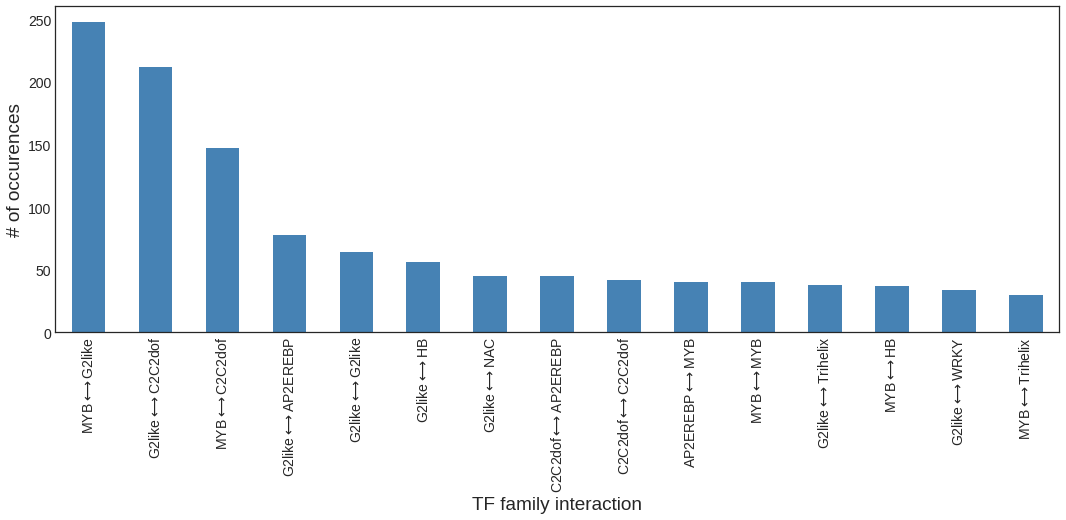

In [46]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

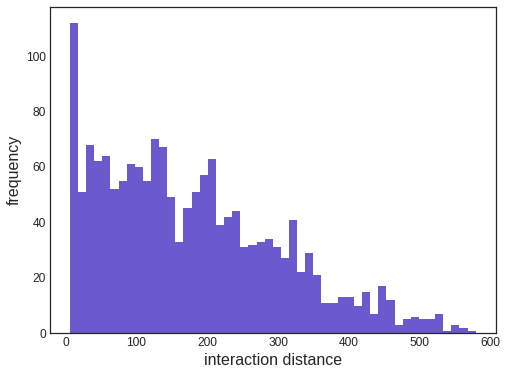

In [47]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

### Most frequent interactions and their respective interaction distances

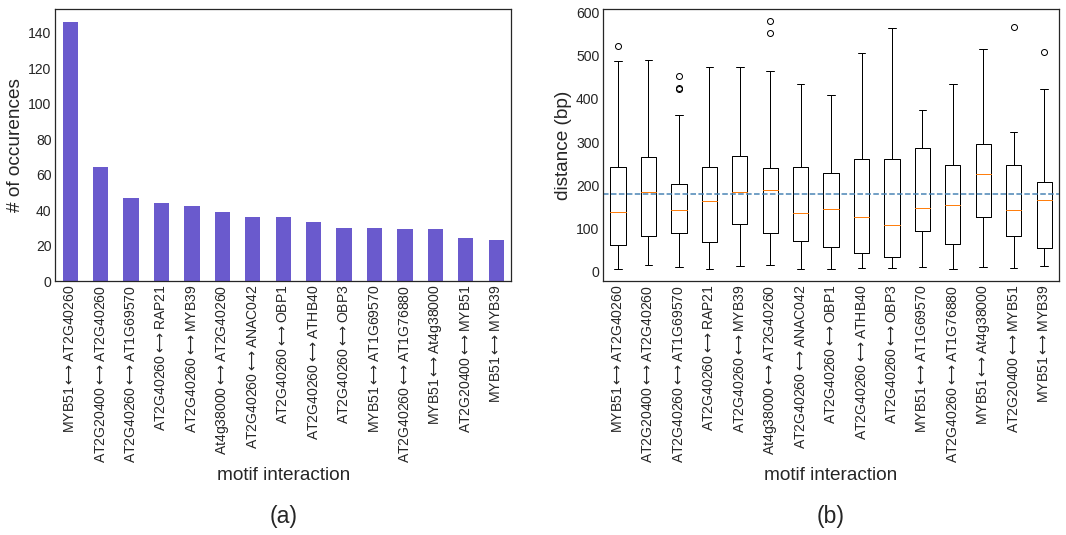

In [48]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True, dist_color='slateblue', cap_pos=[0.5, -0.89])

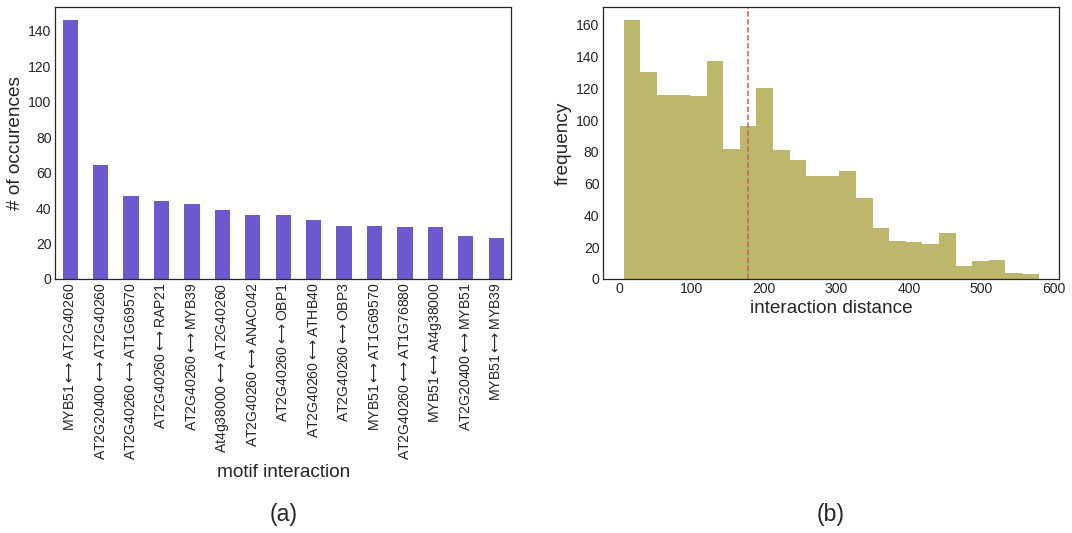

In [49]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True, dist_colors=['slateblue', 'darkkhaki'], cap_pos=[0.5, -0.89])